As the filename suggests, the purpose of this document is to optimize how I use OCR to extract text data from example invoices. Useful list of references below.  

- [pytesseract library](https://pypi.org/project/pytesseract/): lists the core functions and provides basic code examples
- [pytesseract guide](https://nanonets.com/blog/ocr-with-tesseract/): comprehensive guide with preprocessing ideas and many code examples
- [documentation](https://tesseract-ocr.github.io/tessdoc/Command-Line-Usage.html#simplest-invocation-to-ocr-an-image): some documentation showing how to customize OCR's behavior

I will be working primarily off the guide. It has some good ideas for how I can preprocess my data to achieve cleaner text results.

In [8]:
import json
import os
from PIL import Image
from pytesseract import pytesseract

Using work from the previous OCR notebook to get things set up.

In [3]:
tesseract_path = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
pytesseract.tesseract_cmd = tesseract_path

with open('text_data.json', 'r') as f:
    text_data = json.load(f)

From previous work, I know I want to target documents 6-9 by index position in my text data object. I will try some simple preprocessing steps to see if I can improve upon the data already stored in the object.

The first technique I want to try is called thresholding. It appeared to give the best performance in the guide.

I will determine how to apply the threshold to an image, and once I am satisfied with the result, I will apply my threshold to all documents of interest.

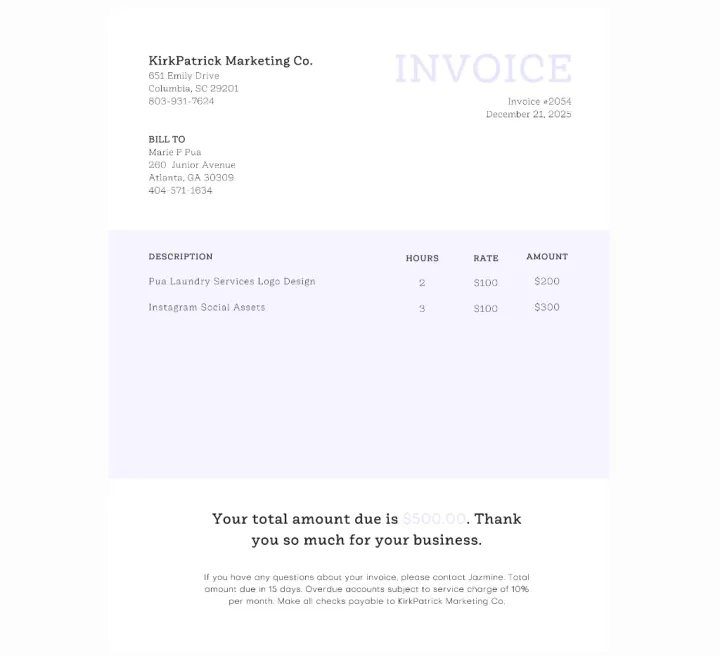

In [91]:
filepath = os.path.join('examples/', text_data[6]['file'])
image = Image.open(filepath)
image

This seems like a good example to use. The text is pretty faded. I'll see if thresholding can improve the contrast between the letters and the background.

I'm going to apply a workflow like the one seen [here](https://stackoverflow.com/questions/68957686/pillow-how-to-binarize-an-image-with-threshold).

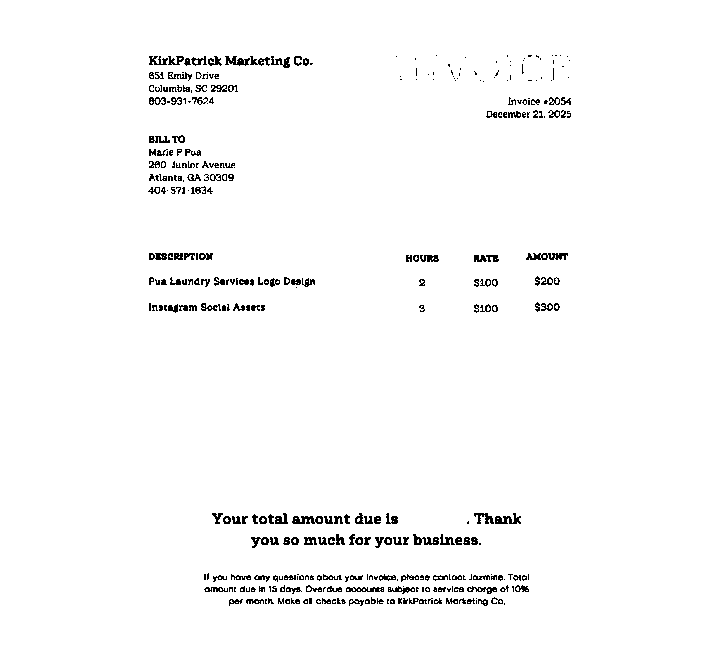

In [94]:
image.convert('L').point(lambda p: 255 if p > 230 else 0)

In [97]:
pytesseract.image_to_string(image.convert('L').point(lambda p: 255 if p > 230 else 0))

'KirkPotrick Marketing Co. .\n\n51 Emily Drive PM eho\n\nCau, SC 20201\n\nos-go1-7624 nwscg 2054\necenbe! 21 2095\n\nsuo\n\nNae FPoa\n\n290 sunlor Avenue\n‘Aslanta, @& 3009\n\n40871-1824\n\nDESEEPTION Hours MATE AMOUNT\n\nPua Laundry Services Loge Design 2 soo $200\n\nInstagram Social Asters 2 sto $800\nYour total amount due is . Thank\n\nyou so much for your business.\n\n1 you hee ey questions about you Ineeee, pao cent Jara. Teel\n‘amount due 1 daya DverGua oncclaea manger 10 servic charge ot YA\n(or month Moke al checks payable ta KrsParrce Merkatng CO,\n\n'

I tried this with many different images. It performed worse across the board after applying thresholding. Converting the image to grayscale also made results worse.

I will mess around with some of the different page segmentation modes to see if I can achieve better results with the base image.

In [110]:
pytesseract.image_to_string(image, config='--psm 11')

'KirkPatrick Marketing Co.\n\n651 Emily Drive\n\nColumbia, SC 29201\n\n503-951-7\n\n4\n\nIn\n\nice #2054\n\nDecember 23.2023\n\nBILL TO\n\nMarie F Pus\n\n280 funtor Avenue\n\nAtionta, GA 30208\n\n404 571-1634\n\nDESCRIPTION\n\namount\n\nHOURS\n\nRate\n\nPua Laundry Services Logo Design\n\n100\n\n$200\n\nInstagram\n\nal Assets\n\ns100\n\n$300\n\nYour total amount due is\n\nThank\n\nyou so much for your business.\n\nWt you nove any questions about your invoice, please cantct Jacmine. Total\n\n‘mount due i 8 days. Overdue aodounta subject to service charge of 10%\n\n‘er month Maka ak checks payabie to KekPatrck Marketing Co,\n'

In [111]:
pytesseract.image_to_string(image)

'KirkPatrick Marketing Co.\n651 Emily Drive\nColumbia, SC 29201\n\n503-951-7624 Invoice «2084\nDecember 23.2023\n\nBILL TO\n\nAtionta, GA 30208\n\n404 571-1634\n\nDESCRIPTION HOURS RATE AMOUNT\n\nPua Laundry Services Logo Design 2 si0a $200\n\nInstagram Social Assets 2 si00 $300\n\nYour total amount due is . Thank\nyou so much for your business.\n\n‘er month Maka ak checks payabie to KekPatrck Marketing Co,\n'

Mode 11 (assume single uniform block of text) performed the best of the other options, but still worse than the default behavior.

At this time, I can't think of a way to improve the performance of OCR. The people who developed this tool did a great job optimizing its default behavior.

My plan to move forward is to focus on extracting addresses using regex. If my program fails to extract whole addresses, it should prompt the user to upload a higher resolution version of the invoice.

I have one more thing to try: preserving the inter-word spacing. This may help me with my regex statement if there are large spaces between multiple addresses on the same line.

Note: it was more useful to write a more accurate regex statement.